<div style="text-align: center; font-size: 30px; font-weight: bold;">
    Assignment/Lab 1: Winter 2025 Group 2
    <br>***
</div>

<h1>Team members</h1>
<b>
    
- Minh Le Nguyen
- Liam Knapp
- Gautam Singh
- Gleb Ignatov

</b>
<br>

---

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Implementing and Testing the K-Nearest Neighbors (KNN) Model
</div>

## I. Objectives

<b>
    
- Set up your Python development environment.
- Get familiar with commonly used Python packages.
- Implement the KNN algorithm from scratch.
- Use your implementation to perform regression on the datasets provided in a separate file.
- Evaluate the performance of your first machine learning algorithm.
    
</b>

**Note: Intructions Details at the bottoms**

### *Formulas

<b>

1. [KNN](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#other)

2. [Linear Regression](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning#linear-models)

</b>

---

## II. Implementation

### Step 1: Set up your Python development environment

In [1]:
pip install numpy pandas scipy matplotlib scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

---

### Step 2: Implement the KNN Algorithm

In [3]:
class KNNRegressor:
    """
    A custom implementation of the K-Nearest Neighbors (KNN) algorithm for regression tasks.
    
    This class supports training on input features and corresponding target values, 
    and predicting target values for new input data based on the K nearest neighbors in the training set.

    Attributes:
        k (int): Number of nearest neighbors to consider for making predictions.
        TrainX (numpy.ndarray): Placeholder for training input features.
        TrainY (numpy.ndarray): Placeholder for training target values.

    Methods:
        __init__(k=3):
            Initializes the KNNRegressor with the specified number of neighbors (k).
            1. Set the K value for the predictions
            2. 
        
        fit(x, y):
            Trains the regressor using the provided input features (x) and target values (y).
        
        predict(x):
            Predicts target values for a given set of input features (x) by:
            1. Calculating the Euclidean distance between each input and training point.
            2. Identifying the indices of the k nearest neighbors.
            3. Averaging the target values of the k nearest neighbors to make a prediction.
            Returns the predictions as a numpy array.
    """
    def __init__(self, k=3):
        self.k = k
         
    def fit(self, x, y):
        self.TrainX = np.array(x)
        self.TrainY = np.array(y)

    def predict(self, x):
        # The inputed target value to be predicted
        x = np.array(x) 

        # Used to store the predicted values for each targeted value point.
        predictions = [] 

        # Loop through each element in the targeted value to predicted
        for targetValue in x: 
            
            #  Step 1: Calculate the Euclidean distance for each point in the training data.
            EuclideanDistances = np.linalg.norm(self.TrainX - targetValue, axis=1)
                # Subtracts the test point (targetValue) from each point in the training dataset (self.TrainX).
                # np.linalg.norm computes the norm (distance) for each vector (row) in the matrix self.TrainX - targetValue.
                # axis=1 means you calculate the norm row-wise (along the columns) which is needed for KNN algorithm.
                # axis=0 means you calculate the norm column-wise (along the rows) which is not useful for KNN since we need the distance between points, not across features.
    
            # Step 2: Get the index's of (self.TrainX) in the training data set using the training points with the least distance.
            NearestNeighboursIndex = np.argsort(EuclideanDistances)[:self.k] 
                # Sorts the array "EuclideanDistances" in ascending order (from smallest to largest).
                # Used to find the Index of the training points with the smallest distance.
                # Only selects the k number of training points specified.

            # Step 3: Get the values for (self.TrainY) in the training dataset using the (self.TrainX) index from previous step.
            NearestNeighbours = self.TrainY[NearestNeighboursIndex]
                # Use the index from NearestNeighboursIndex to select the target values (self.TrainY) in the training data.
                # Selecting the target values (labels) that correspond to those nearest neighbors.

            # Step 4: Average the values (labels) obtained from the previous step.
            predictions.append(np.mean(NearestNeighbours))
                # Computes the average of the target values for the nearest neighbors.
                # The resulting prediction is then appended to the predictions list.
         
        # Return the KNearestNeighbour points
        return np.array(predictions)

#### Stub to test KNN implemented

In [4]:
# Training data (features and target values)
X_train = [[1, 2], [4, 6], [3, 5], [2, 1]]
y_train = [3, 8, 7, 2]

# Test data
X_test = [[2, 3], [3, 4]]

# Initialize and train the model
knn = KNNRegressor(k=2)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)
print(f"Predictions: {predictions}")

Predictions: [2.5 7.5]


---

### Step 3: Load the Dataset

Farm Data Preview:
   FarmSize  FarmPrice
0        70     122136
1        37     125095
2       193     143561
3       174     158979
4       102     158786

Validation Data Preview:
   FarmSize  FarmPrice
0        34     106926
1       118     150154
2       152     167490
3       149     137124
4       161     140769

Farm Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FarmSize   90 non-null     int64
 1   FarmPrice  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB
None

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FarmSize   30 non-null     int64
 1   FarmPrice  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes
None

Farm Data Summary Statistics:
         

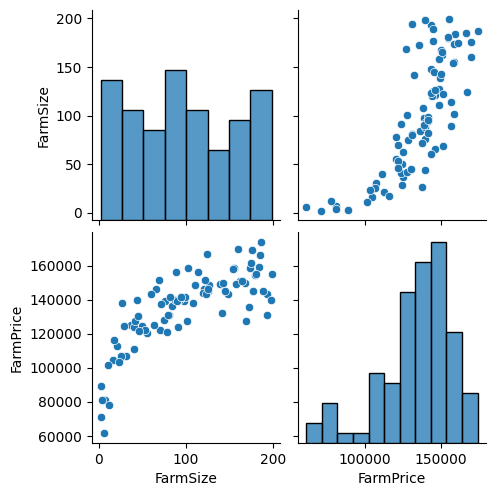

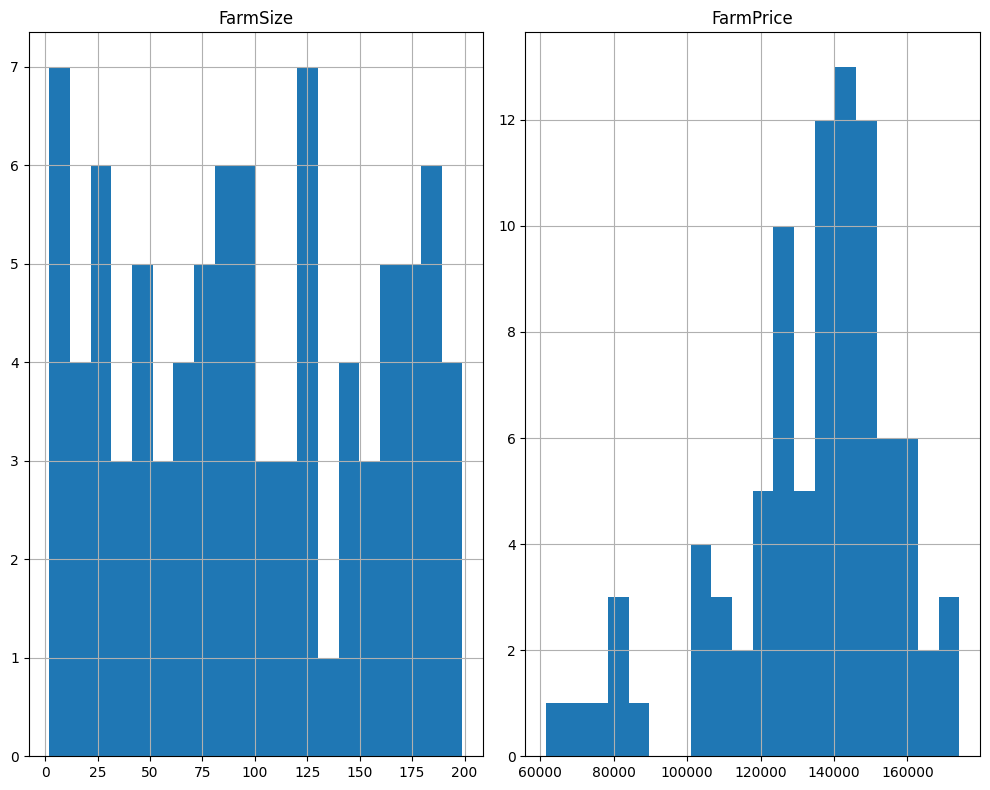

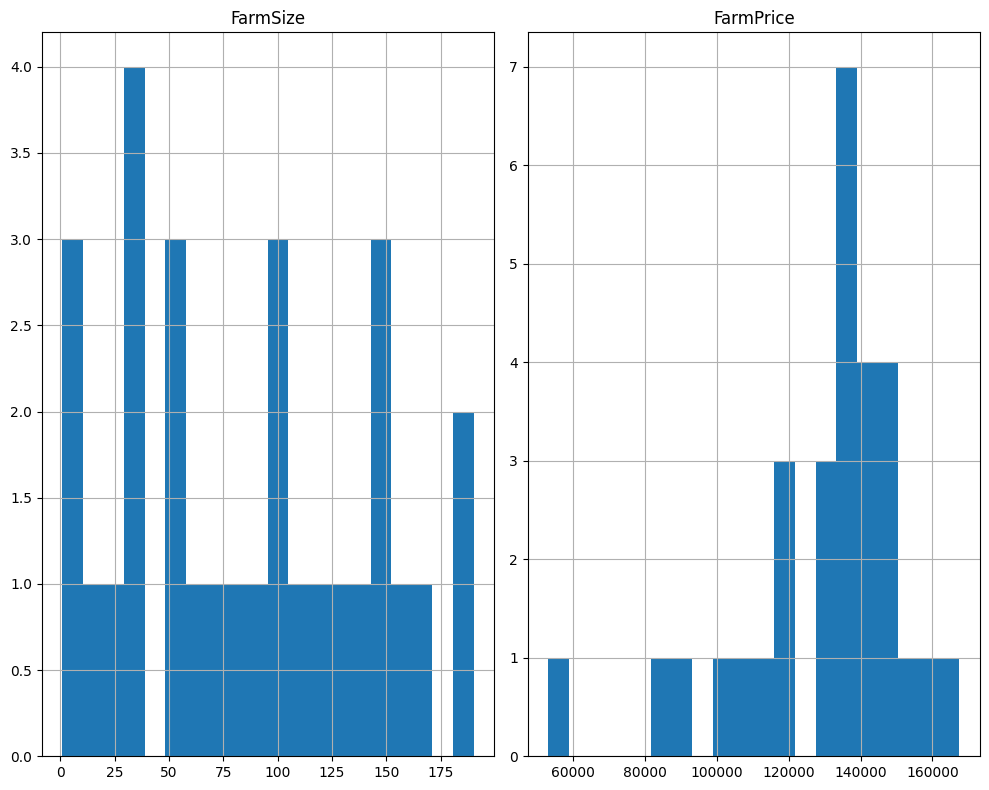

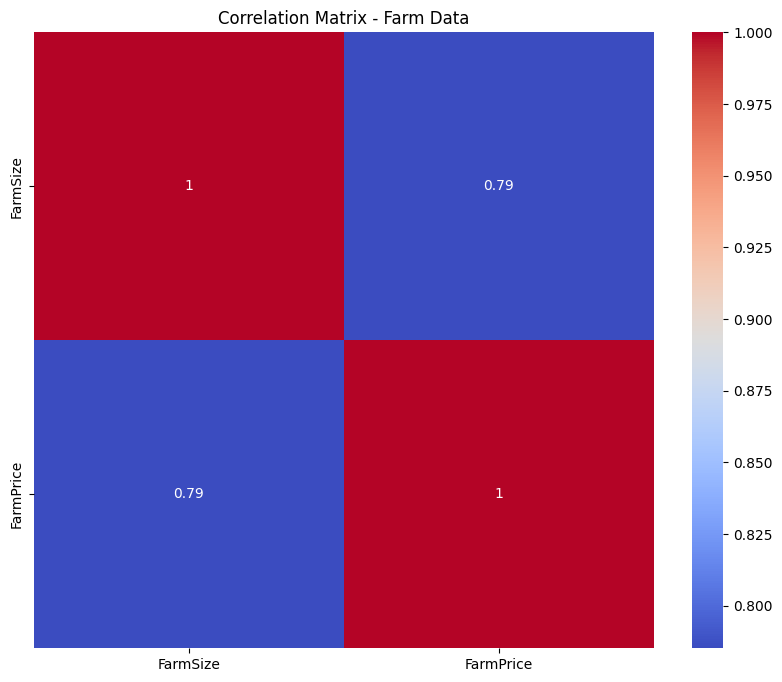

In [13]:
def step_3_load_dataset(file_path="Dataset/training_dataset_lab-1.csv", validation_file_path="Dataset/validation_dataset_lab-1.csv"):
    """
    Load the dataset, prepare the features and target values, and train a KNNRegressor model.
    
    Args:
        file_path (str): Path to the CSV file containing the dataset.
        k (int): The number of nearest neighbors to consider for the KNNRegressor model. Default is 1.
        
    Returns:
        knn_model (KNNRegressor): Trained KNNRegressor model.
        FarmSizeData (numpy.ndarray): Input features (Farm Size) used for training.
        FarmPriceData (numpy.ndarray): Target values (Farm Price) used for training.
    """
    FarmData = pd.read_csv(file_path)
    ValidationData = pd.read_csv(validation_file_path)

    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    
    # Reset column width (if adjusted)
    pd.reset_option('display.max_colwidth')
    
    print("Farm Data Preview:")
    print(FarmData.head())
    
    print("\nValidation Data Preview:")
    print(ValidationData.head())

    print("\nFarm Data Info:")
    print(FarmData.info())
    
    print("\nValidation Data Info:")
    print(ValidationData.info())
    
    print("\nFarm Data Summary Statistics:")
    print(FarmData.describe())
    
    print("\nValidation Data Summary Statistics:")
    print(ValidationData.describe())

    print("\nMissing Values in Farm Data:")
    print(FarmData.isnull().sum())
    
    print("\nMissing Values in Validation Data:")
    print(ValidationData.isnull().sum())

    print("\nDuplicate Rows in Farm Data:", FarmData.duplicated().sum())
    print("Duplicate Rows in Validation Data:", ValidationData.duplicated().sum())

    print("\nFarm Data Types:")
    print(FarmData.dtypes)
    
    print("\nValidation Data Types:")
    print(ValidationData.dtypes)

    sns.pairplot(FarmData)
    plt.show()
    
    # Histogram for numerical distributions
    FarmData.hist(bins=20, figsize=(10, 8))
    plt.tight_layout()
    plt.show()
    
    ValidationData.hist(bins=20, figsize=(10, 8))
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(FarmData.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix - Farm Data')
    plt.show()
    
    return FarmData, ValidationData
    
Farm_Data, Validation_Data = step_3_load_dataset()

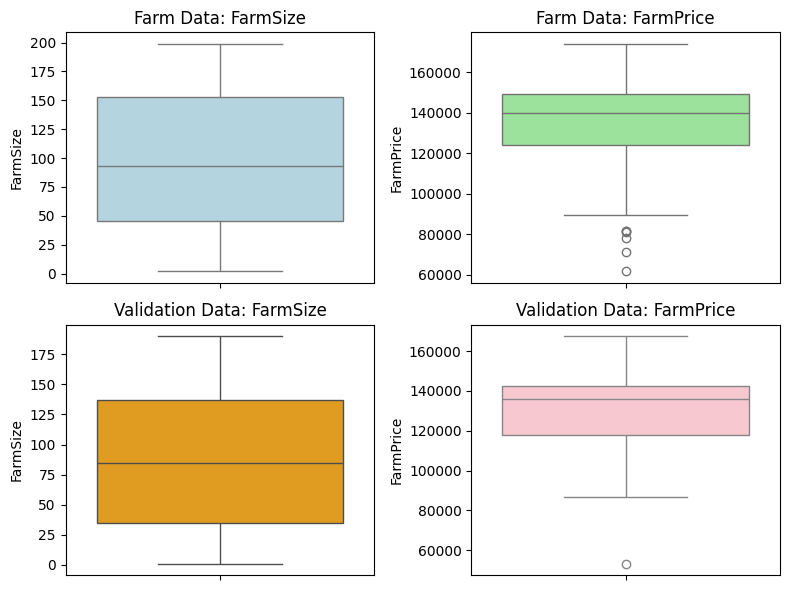

In [6]:
def plot_farm_and_validation_data_boxplots(farm_data, validation_data):
    """
    Plots four box plots in a 2x2 grid comparing 'FarmSize' and 'FarmPrice' 
    for the provided Farm_Data and Validation_Data DataFrames.

    Parameters:
        farm_data (pd.DataFrame): DataFrame containing 'FarmSize' and 'FarmPrice' columns for the farm dataset.
        validation_data (pd.DataFrame): DataFrame containing 'FarmSize' and 'FarmPrice' columns for the validation dataset.

    Returns:
        None: Displays a Matplotlib figure with four box plots.
    """
    # Figure 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2x2 grid of plots

    # Box plot for FarmSize in Farm_Data
    sns.boxplot(y=farm_data['FarmSize'], ax=axes[0, 0], color='lightblue')
    axes[0, 0].set_title('Farm Data: FarmSize')
    axes[0, 0].set_ylabel('FarmSize')

    # Box plot for FarmPrice in Farm_Data
    sns.boxplot(y=farm_data['FarmPrice'], ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Farm Data: FarmPrice')
    axes[0, 1].set_ylabel('FarmPrice')

    # Box plot for FarmSize in Validation_Data
    sns.boxplot(y=validation_data['FarmSize'], ax=axes[1, 0], color='orange')
    axes[1, 0].set_title('Validation Data: FarmSize')
    axes[1, 0].set_ylabel('FarmSize')

    # Box plot for FarmPrice in Validation_Data
    sns.boxplot(y=validation_data['FarmPrice'], ax=axes[1, 1], color='pink')
    axes[1, 1].set_title('Validation Data: FarmPrice')
    axes[1, 1].set_ylabel('FarmPrice')

    plt.tight_layout()
    plt.show()

plot_farm_and_validation_data_boxplots(Farm_Data, Validation_Data)

---

### Step 4: Train the Custom KNN model

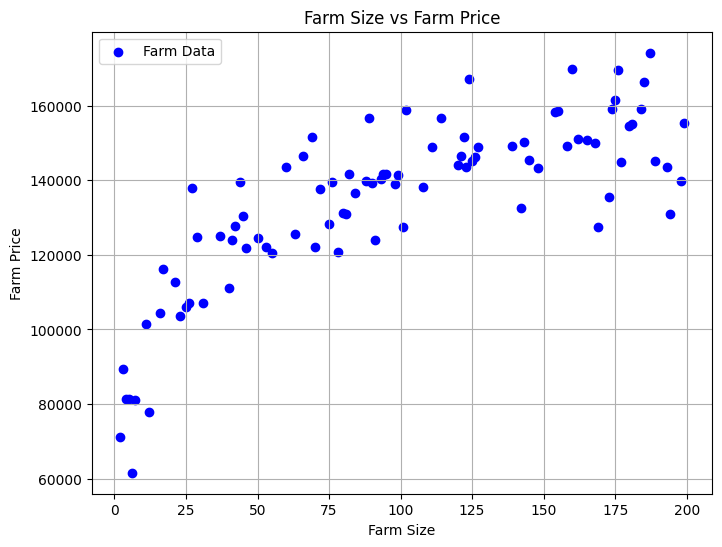

In [7]:
def step_4_train_knn_model(FarmData, k=1):
    """
    Load the dataset, prepare the features and target values, and train a KNNRegressor model.
    
    Args:
        FarmData (pandas dataframe): Pandas dataframe containing the dataset.
        k (int): The number of nearest neighbors to consider for the KNNRegressor model. Default is 1.
        
    Returns:
        knn_model (KNNRegressor): Trained KNNRegressor model.
        FarmSizeData (numpy.ndarray): Input features (Farm Size) used for training.
        FarmPriceData (numpy.ndarray): Target values (Farm Price) used for training.
    """
    # Separate the data into features (X) and target values (Y)
    FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)  # Convert to numpy array and reshape for the model
    FarmPriceData = FarmData["FarmPrice"].values
    
    # Instantiate the KNNRegressor class
    knn_model = KNNRegressor(k=k)
    
    # Fit the model with the training data
    knn_model.fit(FarmSizeData, FarmPriceData)

    plt.figure(figsize=(8, 6))
    plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Farm Data')
    
    # Adding labels and title
    plt.xlabel('Farm Size')
    plt.ylabel('Farm Price')
    plt.title('Farm Size vs Farm Price')
    
    # Display the plot
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return knn_model, FarmSizeData, FarmPriceData

knn_model, FarmSizeData, FarmPriceData = step_4_train_knn_model(Farm_Data, k=1)

---

### Step 5: Test And Evaluate the Custom KNN Model

Predicted Farm Prices: [125095. 144034. 158273. 143257. 151086. 104476. 141471. 145191. 149242.
 139679. 135531.  71107. 121987. 148953. 107156. 128342. 166355. 136516.
 148956.  81007. 139081. 146374. 125095. 120489. 125095. 158786. 137923.
 124450. 145398. 101464.]
Actual Farm Prices: [106926 150154 167490 137124 140769  91182 141781 154987 136817 147294
 149559  53218 137113 134072 116212 135526 160664 147969 135238  86989
 129021 130011 138212 141464 117701 142873 113186 119264 129554 101042]


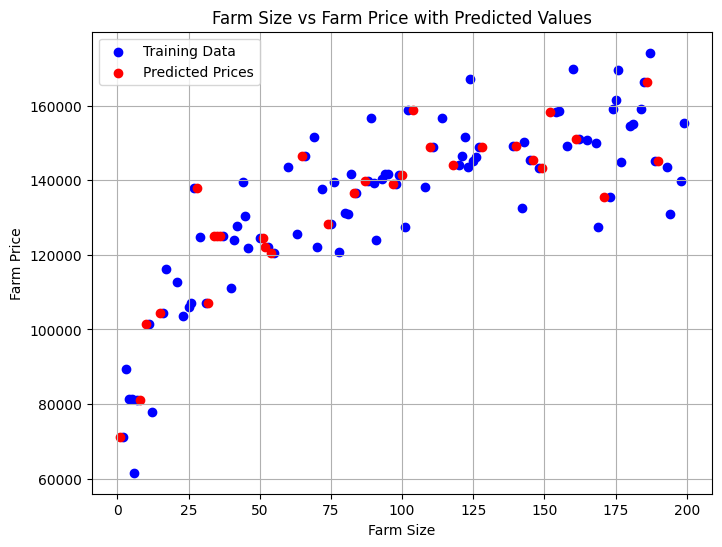

The calculated Root Mean Square Error (RMSE) is: 12581.46331579386


In [8]:
def step_5_validate_knn_model(knn_model, ValidationData, FarmSizeData, FarmPriceData):
    """
    Validate the KNN model using a validation dataset and visualize predictions.
    
    Args:
        knn_model (KNNRegressor): Trained KNNRegressor model.
        ValidationData (pandas dataframe): Pandas dataframe containing the validate dataset.
        FarmSizeData (numpy.ndarray): Input features (Farm Size) from the training dataset.
        FarmPriceData (numpy.ndarray): Target values (Farm Price) from the training dataset.
    
    Returns:
        rmse (float): Root Mean Square Error (RMSE) of the model's predictions on the validation dataset.
    """
    # Separate the validation data into features (X) and target values (Y)
    ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
    ActualFarmPrice = ValidationData["FarmPrice"].values
    
    # Predict FarmPrices using the trained model
    PredictedFarmPrice = knn_model.predict(ValidationFarmSize)
    
    # Compare predicted vs actual values
    print("Predicted Farm Prices:", PredictedFarmPrice)
    print("Actual Farm Prices:", ActualFarmPrice)
    
    # Create a scatter plot for the original training data (blue)
    plt.figure(figsize=(8, 6))
    plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')
    
    # Scatter plot for the predicted farm prices (red)
    plt.scatter(ValidationFarmSize, PredictedFarmPrice, color='red', label='Predicted Prices')
    
    # Adding labels and title
    plt.xlabel('Farm Size')
    plt.ylabel('Farm Price')
    plt.title('Farm Size vs Farm Price with Predicted Values')
    
    # Displaying the legend and the plot
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate the mean squared error (MSE)
    meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()
    
    # Calculate the RMSE by taking the square root of the MSE
    rmse = np.sqrt(meanSquaredError)
    
    # Print the RMSE
    print("The calculated Root Mean Square Error (RMSE) is: " + str(rmse))
    
    return rmse

rmse = step_5_validate_knn_model(knn_model, Validation_Data, FarmSizeData, FarmPriceData)

#### Find the best K for KNN model

In [9]:
def find_best_k(FarmData, ValidationData, k_range=20):
    """
    Find the optimal value of k for the KNNRegressor model by minimizing RMSE on a validation dataset.
    
    Args:
        FarmData (pandas dataframe): Pandas dataframe containing the dataset.
        ValidationData (pandas dataframe): Pandas dataframe containing the validate dataset.
        k_range (int): The range of k values to evaluate (from 1 to k_range). Default is 20.
    
    Returns:
        BestK (int): The value of k with the lowest RMSE.
        BestRMSEValue (float): The RMSE corresponding to the best k value.
    """
    # Separate the training data into features (X) and target values (Y)
    FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)
    FarmPriceData = FarmData["FarmPrice"].values
    
    # Separate the validation data into features (X) and target values (Y)
    ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
    ActualFarmPrice = ValidationData["FarmPrice"].values
    
    # Initialize a list to store RMSE for each k value
    BestRMSE = []
    
    # Iterate over a range of k values
    for z in range(1, k_range + 1):
        # Instantiate the KNNRegressor class
        knn_model = KNNRegressor(k=z)
        
        # Fit the model with the training data
        knn_model.fit(FarmSizeData, FarmPriceData)
        
        # Predict FarmPrices using the trained model
        PredictedFarmPrice = knn_model.predict(ValidationFarmSize)
        
        # Calculate the mean squared error (MSE)
        meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()
        
        # Calculate the RMSE by taking the square root of the MSE
        rmse = np.sqrt(meanSquaredError)
        
        # Store the RMSE value for this k
        BestRMSE.append((z, rmse))
    
    # Find the k with the lowest RMSE
    BestK, BestRMSEValue = min(BestRMSE, key=lambda x: x[1])
    
    # Print the best RMSE and corresponding k value
    print(f"The best k value is {BestK} with an RMSE of {BestRMSEValue}")
    print("")
    print("Number of k:       --- RMSE:")
    for k, rmse in BestRMSE:
        print(f"{k:<18} --- {rmse:.2f}")
    return BestK, BestRMSEValue

BestK, BestRMSEValue = find_best_k(Farm_Data, Validation_Data, k_range=20)

The best k value is 8 with an RMSE of 10891.625992113544

Number of k:       --- RMSE:
1                  --- 12581.46
2                  --- 12708.36
3                  --- 12255.76
4                  --- 11923.66
5                  --- 11609.05
6                  --- 11267.26
7                  --- 11065.20
8                  --- 10891.63
9                  --- 11131.92
10                 --- 11435.81
11                 --- 11661.26
12                 --- 11906.27
13                 --- 12065.01
14                 --- 12300.11
15                 --- 12497.49
16                 --- 12766.33
17                 --- 12802.04
18                 --- 13048.47
19                 --- 13087.04
20                 --- 13361.41


#### Implement best K for Custom KNN Model

Predicted Farm Prices: [120632.25  150395.125 153194.25  148291.875 151866.     94857.375
 141077.875 151812.25  146749.625 138621.25  149836.875  80641.5
 128768.125 145229.75  117929.625 132777.625 153599.75  137129.125
 149095.875  80641.5   139325.    134445.    120632.25  128480.125
 124705.    144026.5   115539.875 128768.125 148291.875  84812.625]
Actual Farm Prices: [106926 150154 167490 137124 140769  91182 141781 154987 136817 147294
 149559  53218 137113 134072 116212 135526 160664 147969 135238  86989
 129021 130011 138212 141464 117701 142873 113186 119264 129554 101042]


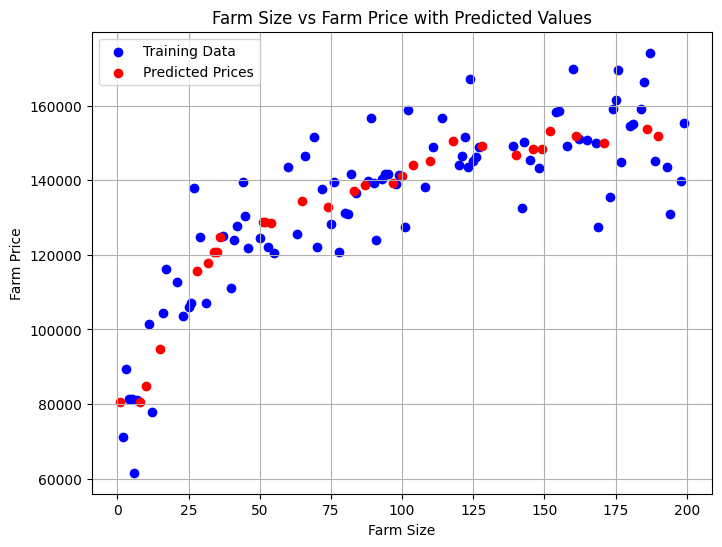

The calculated Root Mean Square Error (RMSE) Custom KNN is: 10891.625992113544


In [10]:
def run_best_knn_model(FarmData, ValidationData, best_k):
    """
    Run the KNN model with the best value of k and evaluate its performance.
    
    Args:
        file_path_train (str): Path to the CSV file containing the training dataset.
        file_path_validation (str): Path to the CSV file containing the validation dataset.
        best_k (int): The best value of k for the KNNRegressor model.
    
    Returns:
        rmse (float): Root Mean Square Error (RMSE) of the model's predictions on the validation dataset.
    """ 
    # Separate the training data into features (X) and target values (Y)
    FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)
    FarmPriceData = FarmData["FarmPrice"].values
    
    # Instantiate the KNNRegressor class with the best k
    knn_model = KNNRegressor(k=best_k)
    
    # Fit the model with the training data
    knn_model.fit(FarmSizeData, FarmPriceData)
    
    # Separate the validation data into features (X) and target values (Y)
    ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
    ActualFarmPrice = ValidationData["FarmPrice"].values
    
    # Predict FarmPrices using the trained model
    PredictedFarmPrice = knn_model.predict(ValidationFarmSize)
    
    # Compare predicted vs actual values
    print("Predicted Farm Prices:", PredictedFarmPrice)
    print("Actual Farm Prices:", ActualFarmPrice)
    
    # Create a scatter plot for the original training data (blue)
    plt.figure(figsize=(8, 6))
    plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')
    
    # Scatter plot for the predicted farm prices (red)
    plt.scatter(ValidationFarmSize, PredictedFarmPrice, color='red', label='Predicted Prices')
    
    # Adding labels and title
    plt.xlabel('Farm Size')
    plt.ylabel('Farm Price')
    plt.title('Farm Size vs Farm Price with Predicted Values')
    
    # Displaying the legend and the plot
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Calculate the mean squared error (MSE)
    meanSquaredError = ((PredictedFarmPrice - ActualFarmPrice) ** 2).mean()
    
    # Calculate the RMSE by taking the square root of the MSE
    rmse = np.sqrt(meanSquaredError)
    
    # Print the RMSE
    print("The calculated Root Mean Square Error (RMSE) Custom KNN is: " + str(rmse))
    
    return rmse, FarmSizeData, FarmPriceData, ValidationFarmSize, PredictedFarmPrice

best_k = 8
rmse, FarmSizeData_Custom_KNN, FarmPriceData_Custom_KNN, ValidationFarmSize_Custom_KNN, PredictedFarmPrice_Custom_KNN = run_best_knn_model(Farm_Data, Validation_Data, best_k)

#### Compare the result of your KNNRegressor with the result of KNeighborsRegressor from scikit-learn. Use visualizations to gain better insights into the results. 


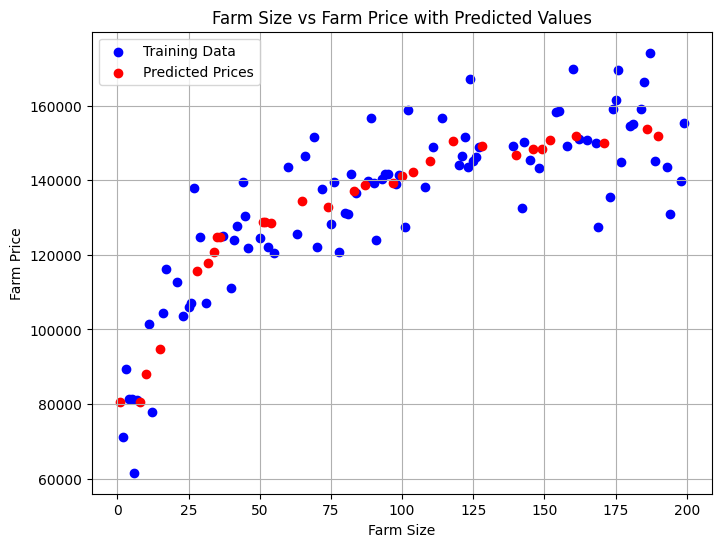

The calculated Root Mean Square Error (RMSE) KNeighborsRegressor from scikit-learn is: 10654.107210807248


In [11]:
from sklearn.neighbors import KNeighborsRegressor

def run_sklearn_knn(FarmData, ValidationData, n_neighbors=1):
    """
    Run the KNN regression using scikit-learn's KNeighborsRegressor and visualize the predictions.
    
    Args:
        file_path_train (str): Path to the CSV file containing the training dataset.
        file_path_validation (str): Path to the CSV file containing the validation dataset.
        n_neighbors (int): Number of neighbors to use for the KNN model. Default is 1.
    
    Returns:
        predictions (numpy.ndarray): Predicted values for the validation dataset.
    """
    # Separate the training data into features (X) and target values (Y)
    FarmSizeData = FarmData["FarmSize"].values.reshape(-1, 1)
    FarmPriceData = FarmData["FarmPrice"].values
    
    # Separate the validation data into features (X) and target values (Y)
    ValidationFarmSize = ValidationData["FarmSize"].values.reshape(-1, 1)
    ActualFarmPrice = ValidationData["FarmPrice"].values
    
    # Initialize and train the KNeighborsRegressor model
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
    neigh.fit(FarmSizeData, FarmPriceData)
    
    # Predict the target values for the validation dataset
    predictions = neigh.predict(ValidationFarmSize)
    
    # Create a scatter plot for the original training data (blue)
    plt.figure(figsize=(8, 6))
    plt.scatter(FarmSizeData, FarmPriceData, color='blue', label='Training Data')
    
    # Scatter plot for the predicted farm prices (red)
    plt.scatter(ValidationFarmSize, predictions, color='red', label='Predicted Prices')
    
    # Adding labels and title
    plt.xlabel('Farm Size')
    plt.ylabel('Farm Price')
    plt.title('Farm Size vs Farm Price with Predicted Values')
    
    # Displaying the legend and the plot
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate the mean squared error (MSE)
    meanSquaredError = ((predictions - ActualFarmPrice) ** 2).mean()
    
    # Calculate the RMSE by taking the square root of the MSE
    rmse = np.sqrt(meanSquaredError)
    
    # Print the RMSE
    print("The calculated Root Mean Square Error (RMSE) KNeighborsRegressor from scikit-learn is: " + str(rmse))
    
    return rmse, FarmSizeData, FarmPriceData, ValidationFarmSize, predictions

rmse, FarmSizeData_KNeighborsRegressor, FarmPriceData_KNeighborsRegressor, ValidationFarmSize_KNeighborsRegressor, predictions_KNeighborsRegressor = run_sklearn_knn(Farm_Data, Validation_Data, n_neighbors=8)

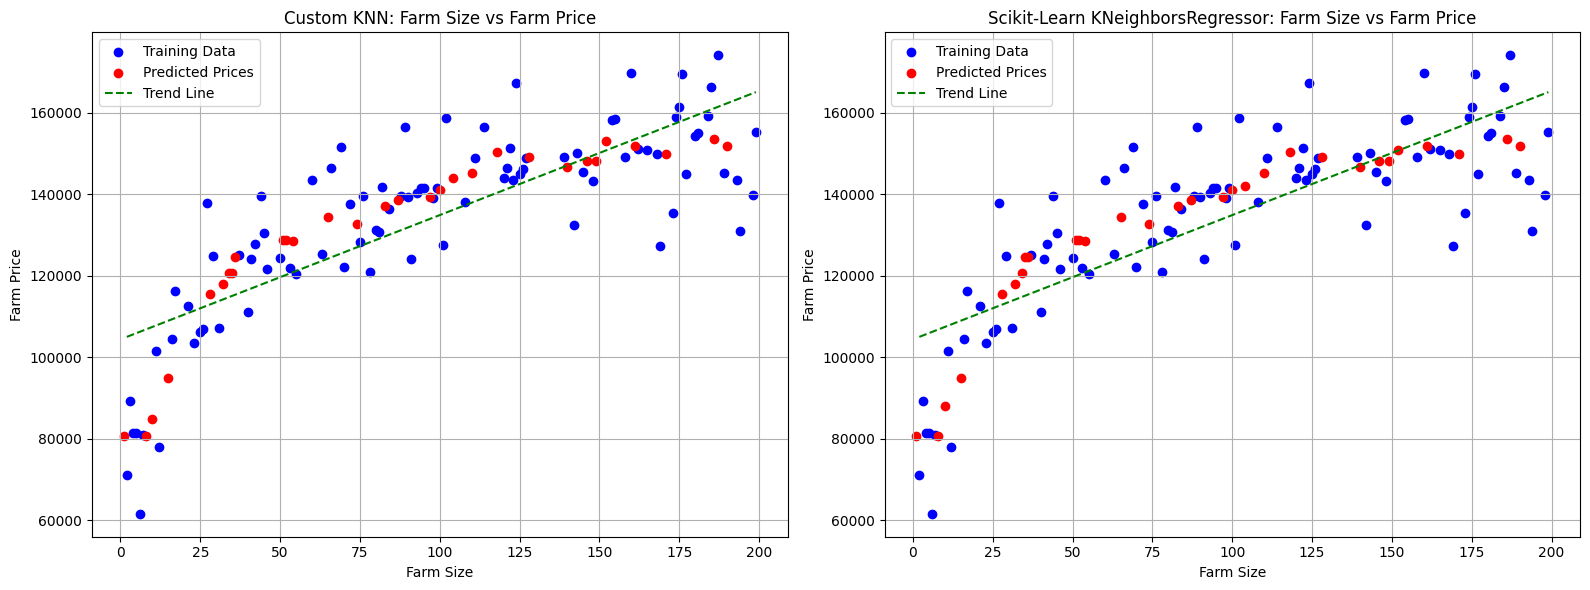

In [12]:
def plot_comparison_with_trendlines(
    farm_size_custom_knn, farm_price_custom_knn, validation_size_custom_knn, predicted_price_custom_knn,
    farm_size_sklearn, farm_price_sklearn, validation_size_sklearn, predicted_price_sklearn
):
    """
    Plots a side-by-side comparison of scatter plots for custom KNN implementation and Scikit-Learn's KNeighborsRegressor
    with trend lines for each dataset.

    Parameters:
        farm_size_custom_knn (array-like): Farm size data for the custom KNN training dataset.
        farm_price_custom_knn (array-like): Farm price data for the custom KNN training dataset.
        validation_size_custom_knn (array-like): Farm size validation data for the custom KNN predictions.
        predicted_price_custom_knn (array-like): Predicted farm prices for the custom KNN model.
        farm_size_sklearn (array-like): Farm size data for the Scikit-Learn KNeighborsRegressor training dataset.
        farm_price_sklearn (array-like): Farm price data for the Scikit-Learn KNeighborsRegressor training dataset.
        validation_size_sklearn (array-like): Farm size validation data for the Scikit-Learn KNeighborsRegressor predictions.
        predicted_price_sklearn (array-like): Predicted farm prices for the Scikit-Learn KNeighborsRegressor model.

    Returns:
        None: Displays a Matplotlib figure with two scatter plots and corresponding trend lines.
    """
    # Flatten Data to 1D
    farm_size_custom_knn = np.array(farm_size_custom_knn).flatten()
    farm_price_custom_knn = np.array(farm_price_custom_knn).flatten()
    validation_size_custom_knn = np.array(validation_size_custom_knn).flatten()
    predicted_price_custom_knn = np.array(predicted_price_custom_knn).flatten()

    farm_size_sklearn = np.array(farm_size_sklearn).flatten()
    farm_price_sklearn = np.array(farm_price_sklearn).flatten()
    validation_size_sklearn = np.array(validation_size_sklearn).flatten()
    predicted_price_sklearn = np.array(predicted_price_sklearn).flatten()

    # Linear fit to calculate coefficients to make trend line
    # Custom KNN Trend Line
    coefficients_custom = np.polyfit(farm_size_custom_knn, farm_price_custom_knn, 1)  
    trendline_custom = np.poly1d(coefficients_custom)

    # Scikit-Learn KNeighborsRegressor Trend Line
    coefficients_sklearn = np.polyfit(farm_size_sklearn, farm_price_sklearn, 1)
    trendline_sklearn = np.poly1d(coefficients_sklearn)

    # Create a figure 1 row, 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Custom KNN scatter plot
    ax[0].scatter(farm_size_custom_knn, farm_price_custom_knn, color='blue', label='Training Data')
    ax[0].scatter(validation_size_custom_knn, predicted_price_custom_knn, color='red', label='Predicted Prices')
    ax[0].plot(sorted(farm_size_custom_knn), trendline_custom(sorted(farm_size_custom_knn)), color='green', linestyle='--', label='Trend Line')

    ax[0].set_xlabel('Farm Size')
    ax[0].set_ylabel('Farm Price')
    ax[0].set_title('Custom KNN: Farm Size vs Farm Price')
    ax[0].legend()
    ax[0].grid(True)

    # Scikit-Learn KNeighborsRegressor scatter plot
    ax[1].scatter(farm_size_sklearn, farm_price_sklearn, color='blue', label='Training Data')
    ax[1].scatter(validation_size_sklearn, predicted_price_sklearn, color='red', label='Predicted Prices')
    ax[1].plot(sorted(farm_size_sklearn), trendline_sklearn(sorted(farm_size_sklearn)), color='green', linestyle='--', label='Trend Line')

    ax[1].set_xlabel('Farm Size')
    ax[1].set_ylabel('Farm Price')
    ax[1].set_title('Scikit-Learn KNeighborsRegressor: Farm Size vs Farm Price')
    ax[1].legend()
    ax[1].grid(True)

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

plot_comparison_with_trendlines(
    FarmSizeData_Custom_KNN, FarmPriceData_Custom_KNN, ValidationFarmSize_Custom_KNN, PredictedFarmPrice_Custom_KNN,
    FarmSizeData_KNeighborsRegressor, FarmPriceData_KNeighborsRegressor, ValidationFarmSize_KNeighborsRegressor, predictions_KNeighborsRegressor
)

---

### Step 6: Answer the following questions:

<b>

- How does the choice of k affect the model's performance?
- What challenges did you face while implementing the KNNRegressor algorithm?
- How does the KNNRegressor algorithm handle noisy data?

</b>

<div style="font-size: 16px;font-weight: bold;">

1. The value of K has a large impact on the model's output, a small K value makes the model highly sensitive to each data point which may lead to overfitting and can be thrown off by noise. A large K value smoothens out the model by reducing the impact of noise but could lead to undefitting if the model is too large, they can also make the model less flexible by ignoring smaller patterns. A K value with the lowest RMSE is the perfect tradeoff between under and over fitting and results in the best performance.

2. When we develop the KNN algorithms, while the process seemingly straightforward but it revealed few challenges that required careful consideration and technical adjustments that we can list are: Selecting the Optimal Number of Neighbors (k) and Dealing with Sensitivity of Outliers because KNN is sensitive to outliers that the KNN algorithms relies on distance calculations to identify the nearest neighbors, and outliers can disproportionately affect these distances, leading to skewed predictions.

3. The KNNRegressor predicts the target value by averaging the target values of K nearest neighbors, the larger K is the more noise is reduced because the prediction is based on multiple neighbors rather than a single data point. If a dataset has a very large amount of noise then even a large K value will reduce the impact, in such cases we should preprocess the data by smoothing the values.

</div>

---

## III. Instructions

### Step 1: Set up your Python development environment

<b>

1. Download and install Anaconda distribution platform
2. Create a virtual environment and name it “aimlcourse”
3. Install the following python packages:
    - Data Manipulation and Analysis:
        - NumPy: For numerical computing and handling multi-dimensional arrays.
        - Pandas: For data manipulation and analysis with easy-to-use data structures like DataFrames.
        - SciPy: A library for scientific computing with modules for optimization, integration, interpolation, and more.
    - Data Visualization:
        - Matplotlib: For creating static, interactive, and animated visualizations.
    - Core Machine Learning Libraries:
        - scikit-learn: A powerful library for traditional machine learning algorithms, preprocessing, and evaluation metrics. Includes tools for regression, classification, clustering, and dimensionality reduction.

</b>

---

### Step 2: Implement the KNN Algorithm (3 pts.)

#### Implement the KNN algorithm from scratch without using any machine learning libraries like `scikit-learn` for the core functionality. Follow these steps:

<b>

1. Create a KNNRegressor class with the following methods:
    - fit (X, y): Train the algorithm for the given X and y. Where X : is the input features, y: is the output.
    - predict (X): Predicts the target values for a given set of examples.
    - You should add other methods or modify the input arguments for the methods above as needed.
2. In your implementation, you must set the Euclidean distance formula as the default method to compute distances between points.
3. Return the average target value of the k nearest neighbors for regression.

</b>

---

### Step 3: Load the Dataset (0.5 pt.)
#### Files named training_dataset_lab-1.csv and validation_dataset_lab-1.csv containing the datasets. Perform the following:

<b>

1. Load the data from the provided csv files.
2. Ensure you understand the dataset before proceeding with your implementation. Use visualizations to gain better insights.
3. Preprocess the data if necessary (e.g., handle missing values).

</b>

---

### Step 4: Train the KNN Model (0.5 pt.)

<b>

1. Initialize your KNNRegressor model with a value of k = 1.
2. Train the KNNRegressor model using the `fit` method with the provided training dataset.

</b>

---

### Step 5: Test and Evaluate the Model (3 pts.)

<b>

1. Use the `predict` method to predict target values for the validation dataset.
2. Calculate the Root Mean Squared Error (RMSE) of your model.
3. Experiment with different values of `k` and record the RMSE for each k and select the best k.
4. Compare the nearest neighbour model (k =1) with the model which is corresponding to the best ‘k’ from step3. Use visualizations to gain better insights into the results.
5. Compare the result of your KNNRegressor with the result of KNeighborsRegressor from scikit-learn. Use visualizations to gain better insights into the results.
   
</b>

---

### Step 6: Answer the following questions in your Jupyter notebook: (1.5 pts.)

<b>

1. How does the choice of k affect the model's performance?
2. What challenges did you face while implementing the KNNRegressor algorithm?
3. How does the KNNRegressor algorithm handle noisy data?
   
</b>